In [567]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [568]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import activations
from tensorflow.keras.layers import Concatenate,MaxPooling2D, Conv2D, Input, Dense, RepeatVector, Reshape, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2
import os


In [569]:
np.set_printoptions(suppress=True)   # suppress scientific notation


In [570]:
mnist = tf.keras.datasets.mnist

(x_train, label_train), (x_test, label_test) = mnist.load_data()


In [571]:
x_train_new = x_train[:4000]
label_train_new = label_train[:4000]
x_val_new = x_train[4000:5000]
label_val_new = label_train[4000:5000]
x_test_new = x_test[:1000]
label_test_new = label_test[:1000]


In [572]:
label_train[0]

5

In [573]:
#Now we have to normalize the values of the pixels, so we will able to train neural networks with the ease

In [574]:
# label_train_new = label_train_new.astype('float32')
# label_test = label_test.astype('float32')
# label_val = label_val.astype('float32')
x_train, x_test, x_val = x_train / 255.0, x_test / 255.0, x_val_new/255.0
print(x_val.size)

784000


In [575]:
# -----------
# Save an image to a file
#-----------
# cv2.imwrite("x_train_0.png", x_train[0])

#make output directory
os.system('mkdir output')


for i in range(5):
	cv2.imwrite("output/train_{}.png".format(i), 255*x_train[i])
	cv2.imwrite("output/test_{}.png".format(i), 255*x_test[i])

for i in range(5):
	cv2.imwrite("output/validation_{}.png".format(i), 255*x_val[i])

In [576]:
num_train = x_train_new.shape[0]
num_test  = x_test_new.shape[0]
num_validation = x_val_new.shape[0]

print(num_train, num_test, num_validation)

4000 1000 1000


In [577]:
# One-hot encode the training
y_train = np.zeros([num_train, 10])
for i in range(num_train):
  y_train[i, label_train_new[i]] = 1

# One-hot encode the testing
y_test  = np.zeros([num_test, 10])
for i in range(num_test):
	y_test[i, label_test[i]] = 1

# One-hot encode the validation
y_val = np.zeros([num_validation, 10])
for i in range(num_validation):
  y_val[i, label_val_new[i]] = 1

In [578]:
print(y_train.shape)
print(label_train_new[5])

(4000, 10)
2


In [579]:
print(num_train, num_test, num_validation) 

4000 1000 1000


In [580]:
print(x_train.shape[0], x_train.shape[1], x_train.shape[2])

60000 28 28


In [581]:
#Reshape into 28 x 28 shape
x_train_new = np.reshape(x_train_new, (-1, x_train_new.shape[1] * x_train_new.shape[2]))
x_test_new = np.reshape(x_test_new, (-1, x_test_new.shape[1] * x_test_new.shape[2]))
x_val_new = np.reshape(x_val_new, (-1, x_val.shape[1] * x_val.shape[2]))

In [582]:
print(x_train_new.shape, x_test_new.shape, x_val.shape)

(4000, 784) (1000, 784) (1000, 28, 28)


#Create ResNet5 model

In [583]:
batch_size = 100
num_filters = 2

In [584]:
inputs = Input(shape=x_train_new.shape[1] , name="input_1")
repeat = RepeatVector(2, name="repeat_vector_1")(inputs)
print(inputs.shape)
reshape = Reshape((28, 28, 2), name="reshape_1")(repeat)


(None, 784)


In [585]:
#conv2d -> reshape_1[0][0]
t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters, activation='relu',
               padding="same",  name="conv2d")(reshape)

print(t.shape)

(None, 28, 28, 2)


In [586]:
#conv2d_1 -> conv2d[0][0]
t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
           activation='relu',
               padding="same",  name="conv2d_1")(t)
print(t.shape)
              

(None, 28, 28, 2)


In [587]:
#concatenate -> reshape_1[0][0], conv2d_1[0][0]
t = Concatenate(name="concatenate")([reshape, t])

print(t.shape)

(None, 28, 28, 4)


In [588]:
#max_pooling2d -> concatenate[0][0]
t = MaxPooling2D(2,2)(t)
MP_2D = t
print(MP_2D.shape)

(None, 14, 14, 4)


In [589]:
# ##reshape = Reshape((28, 28, 2), name="reshape_2")(repeat) 

In [590]:
#conv2d_2 -> max_pooling2d Line 8
t = Conv2D(kernel_size=3,
               strides=1,
               filters=4,
           activation='relu',
               padding="same",  name="conv2d_2")(t)
print(t.shape)

(None, 14, 14, 4)


In [591]:
#conv2d_3 -> conv2d_2 Line 9
t = Conv2D(kernel_size=3,
               strides=1,
               filters=4,
           activation='relu',
               padding="same",  name="conv2d_3")(t)
print(t.shape)

(None, 14, 14, 4)


In [592]:
#concatenate_1 -> max_pooling2d, conv2d_3 Line 10

t = Concatenate(name="concatenate_1")([MP_2D, t])
print(t.shape)

(None, 14, 14, 8)


In [593]:
#max_pooling2d_1 -> concatenate_1 Line 11

t = MaxPooling2D(2,2)(t)
MP_2D_1 = t
print(MP_2D_1.shape)

(None, 7, 7, 8)


In [594]:
#conv2d_4 -> max_pooling2d_1 Line 12
t = Conv2D(kernel_size=3,
               strides=1,
               filters=8,
           activation='relu',
               padding="same",  name="conv2d_4")(MP_2D_1)
print(t.shape)

(None, 7, 7, 8)


In [595]:
#conv2d_5 -> conv2d_4 Line 13
t = Conv2D(kernel_size=3,
               strides=1,
               filters=8,
           activation='relu',
               padding="same",  name="conv2d_5")(t)
print(t.shape)

(None, 7, 7, 8)


In [596]:
#concatenate_2 -> max_pooling2d_1, conv2d_5 Line 14

t = Concatenate(name="concatenate_2")([MP_2D_1, t])
print(t.shape)

(None, 7, 7, 16)


In [597]:
#max_pooling2d_2 -> concatenate_2 Line 15

t = MaxPooling2D(2,2)(t)
MP_2D_2 = t
print(MP_2D_2.shape)

(None, 3, 3, 16)


In [598]:
#conv2d_6 -> MP_2D_2 Line 16
t = Conv2D(kernel_size=3,
               strides=1,
               filters=16,
           activation='relu',
               padding="same",  name="conv2d_6")(t)
print(t.shape)

(None, 3, 3, 16)


In [599]:
#conv2d_7 -> conv_2d_6 Line 17
t = Conv2D(kernel_size=3,
               strides=1,
               filters=16,
           activation='relu',
               padding="same",  name="conv2d_7")(t)
print(t.shape)

(None, 3, 3, 16)


In [600]:
#concatenate_3 -> max_pooling2d_2, conv2d_7 Line 18

t = Concatenate(name="concatenate_3")([MP_2D_2, t])
print(t.shape)

(None, 3, 3, 32)


In [601]:
#max_pooling2d_3 -> concatenate_3 Line 19

t = MaxPooling2D(2,2)(t)
MP_2D_3 = t
print(MP_2D_3.shape)

(None, 1, 1, 32)


In [602]:
#conv2d_8 -> max_pooling_2d_3 Line 20
t = Conv2D(kernel_size=3,
               strides=1,
               filters=32,
           activation='relu',
               padding="same",  name="conv2d_8")(t)
print(t.shape)

(None, 1, 1, 32)


In [603]:
#conv2d_9 -> conv2d_8 Line 21
t = Conv2D(kernel_size=3,
               strides=1,
               filters=32,
           activation='relu',
               padding="same",  name="conv2d_9")(t)
print(t.shape)

(None, 1, 1, 32)


In [604]:
#concatenate_4 -> max_pooling2d_3, conv2d_9

# t = Concatenate(name="concatenate_4")([MP_2D_3, t])

In [605]:
#flatten -> conv2d_9

t = Flatten()(t)
print(t.shape)

(None, 32)


In [606]:
#dense -> flatten

t = Dense(20, activation='relu')(t) 
print(t.shape)

(None, 20)


In [607]:
#dense_1 -> dense

output = Dense(10, activation='softmax')(t) 
print(output)



KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_27/Softmax:0', description="created by layer 'dense_27'")


In [608]:
model = Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 repeat_vector_1 (RepeatVector)  (None, 2, 784)      0           ['input_1[0][0]']                
                                                                                                  
 reshape_1 (Reshape)            (None, 28, 28, 2)    0           ['repeat_vector_1[0][0]']        
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 2)    38          ['reshape_1[0][0]']              
                                                                                           

In [609]:
################################################################################################################################################################



****************** epoch - 1 ******************

Training acc over epoch: 0.15099999
Validation acc over epoch: 0.23899999
Test acc over epoch: 0.25099999
Train Loss: 3.155305862426758
Validation Loss: 2.182443618774414
Test Loss: 2.147869825363159


****************** epoch - 2 ******************

Training acc over epoch: 0.34150001
Validation acc over epoch: 0.40400001
Test acc over epoch: 0.37799999
Train Loss: 1.9424514770507812
Validation Loss: 1.7080084085464478
Test Loss: 1.7207103967666626


****************** epoch - 3 ******************

Training acc over epoch: 0.46075001
Validation acc over epoch: 0.51499999
Test acc over epoch: 0.49700001
Train Loss: 1.508156657218933
Validation Loss: 1.368237018585205
Test Loss: 1.4184798002243042


****************** epoch - 4 ******************

Training acc over epoch: 0.59224999
Validation acc over epoch: 0.61699998
Test acc over epoch: 0.60799998
Train Loss: 1.1854530572891235
Validation Loss: 1.1152193546295166
Test Loss: 1.136727

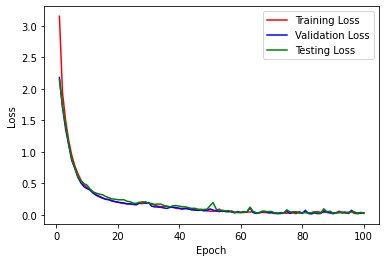

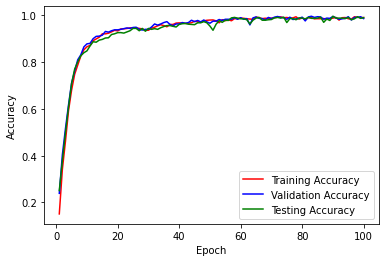

In [610]:
#save model summary in text file
with open('output/modelsummary.txt', 'w') as f:
    model.summary(print_fn=lambda x: f.write(x + '\n'))

#make output directory
#os.system('mkdir output')


#Now do the training
from statistics import mean
import math
# def loss(y, y_hat):
#     loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
#     return loss

# loss_fn = tf.keras.losses.MeanSquaredError()
# model.compile(optimizer='adam',
#               loss=loss_fn,
#               metrics=['accuracy'])
# md = model.fit(x_train_new, y_train, epochs=10)
# metrics = model.evaluate(x_test_new,  y_test, verbose=2)




batch_size = 100
num_batches = num_train/batch_size



val_dataset = tf.data.Dataset.from_tensor_slices((x_val_new, y_val))
val_dataset = val_dataset.batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test_new, y_test))
test_dataset = test_dataset.batch(batch_size)

loss_fn = keras.losses.SparseCategoricalCrossentropy()
train_acc_metric = keras.metrics.CategoricalAccuracy()
# train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.CategoricalAccuracy()
test_acc_metric = keras.metrics.CategoricalAccuracy()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

epoch_loss_train = []
epoch_loss_test = []
epoch_loss_val = []

epoch_acc_train = []
epoch_acc_test = []
epoch_acc_val = []


for epoch in range(100):


    print("\n\n****************** epoch - {} ******************\n".format(epoch+1))
    loss_train = []
    loss_test = []
    loss_val = []


    for batch_i in range(0,int(num_batches)):
      with tf.GradientTape() as tape:
        x = x_train_new[batch_i*100:batch_i*100+100,:]
        y = y_train[batch_i*100:batch_i*100+100,:]
        x_tensor = K.constant(x)
        y_tensor = K.constant(y)
        predict_tensor = model(x_tensor,training=True)    # This runs the data through the model   F(x)
        batch_log_loss = (-1/x_tensor.shape[0])*tf.math.reduce_sum(y_tensor * tf.math.log(tf.clip_by_value(predict_tensor,0.0000001,10.0)))
        batch_log_loss_np = batch_log_loss.numpy()
        loss_train.append(batch_log_loss_np)

      grads = tape.gradient(batch_log_loss, model.trainable_weights)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))
      train_acc_metric.update_state(y_tensor, predict_tensor)

    train_acc = train_acc_metric.result()
    epoch_acc_train.append(train_acc)
    print("Training acc over epoch: %.8f" % (float(train_acc),))

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()



    for batch_i in range(0,10):
      with tf.GradientTape() as tape:
        x = x_val_new[batch_i*100:batch_i*100+100,:]
        y = y_val[batch_i*100:batch_i*100+100,:]
        x_tensor = K.constant(x)
        y_tensor = K.constant(y)
        predict_tensor = model(x_tensor, training=False)    # This runs the data through the model   F(x)
        batch_log_loss = (-1/x_tensor.shape[0])*tf.math.reduce_sum(y_tensor * tf.math.log(tf.clip_by_value(predict_tensor,0.0000001,10.0)))
        # loss_val = loss_val.append(batch_log_loss.numpy())
        batch_log_loss_np = batch_log_loss.numpy()
        loss_val.append(batch_log_loss_np)


      grads = tape.gradient(batch_log_loss, model.trainable_weights)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))
      val_acc_metric.update_state(y_tensor, predict_tensor)

    val_acc = val_acc_metric.result()
    epoch_acc_val.append(val_acc)
    print("Validation acc over epoch: %.8f" % (float(val_acc),))

    # Reset training metrics at the end of each epoch
    val_acc_metric.reset_states()


    for batch_i in range(0,10):
      with tf.GradientTape() as tape:
        x = x_test_new[batch_i*100:batch_i*100+100,:]
        y = y_test[batch_i*100:batch_i*100+100,:]
        x_tensor = K.constant(x)
        y_tensor = K.constant(y)
        predict_tensor = model(x_tensor)    # This runs the data through the model   F(x) 
        batch_log_loss = (-1/x_tensor.shape[0])*tf.math.reduce_sum(y_tensor * tf.math.log(tf.clip_by_value(predict_tensor,0.0000001,10.0)))
        # loss_test = loss_test.append(batch_log_loss.numpy())
        batch_log_loss_np = batch_log_loss.numpy()
        loss_test.append(batch_log_loss_np)


      grads = tape.gradient(batch_log_loss, model.trainable_weights)
      optimizer.apply_gradients(zip(grads, model.trainable_weights))
      test_acc_metric.update_state(y_tensor, predict_tensor)


    test_acc = test_acc_metric.result()
    epoch_acc_test.append(test_acc)
    print("Test acc over epoch: %.8f" % (float(test_acc),))

    # Reset training metrics at the end of each epoch
    test_acc_metric.reset_states()
    
    epoch_loss_train.append(np.mean(loss_train))
    epoch_loss_test.append(np.mean(loss_test))
    epoch_loss_val.append(np.mean(loss_val))
    print("Train Loss: {}".format(tf.reduce_mean(loss_train)))
    print("Validation Loss: {}".format(tf.reduce_mean(loss_val)))
    print("Test Loss: {}".format(tf.reduce_mean(loss_test)))
    # if epoch_acc_val[-1] > val_acc_threshold:
    #     print("Validation loss does not improved! early stopping")
    #     break


# Now plot the loss and accuracy metrics

training_loss = [i+1 for i in range(len(epoch_loss_train))]
validation_loss = [i+1 for i in range(len(epoch_loss_val))]
testing_loss = [i+1 for i in range(len(epoch_loss_test))]

# print(len(epoch_loss_train))
# print(len(epoch_loss_val))
# print(len(epoch_loss_test))


# Visualize loss history
# print(len(training_loss), len(epoch_loss_train))
plt.plot(training_loss, epoch_loss_train, 'r')
plt.plot(training_loss, epoch_loss_val, 'b')
plt.plot(training_loss, epoch_loss_test, 'g')
plt.legend(['Training Loss', 'Validation Loss', 'Testing Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig("output/loss.png")
plt.show()


# Visualize loss history
# print(len(training_loss), len(epoch_acc_train))
plt.plot(training_loss, epoch_acc_train, 'r')
plt.plot(training_loss, epoch_acc_val,  'b')
plt.plot(training_loss, epoch_acc_test, 'g')
plt.legend(['Training Accuracy', 'Validation Accuracy', 'Testing Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig("output/accuracy.png")
plt.show()